<a href="https://colab.research.google.com/github/ellsafiorenza/ellsafiorenza.github.io/blob/main/contraceptives_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# modules for research report
from datascience import *
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# module for YouTube video
from IPython.display import YouTubeVideo

# okpy config
from client.api.notebook import Notebook
ok = Notebook('contraceptives-final-project.ok')
_ = ok.auth(inline=True)

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


# 1987 National Indonesia Contraceptive Prevalence Survey

This dataset was retrieved from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice).
The data in this notebook is a subset from the original data, and has been cleaned for your convenience. A brief descriptive
summary of the dataset is provided below. 

**NB: You may not copy any public analyses of this dataset. Doing so will result in a zero.**

## Summary

>The National Indonesia Contraceptive Prevalence Survey (NICPS) collected data on fertility and family planning in 1987 to measure
the effectiveness of Indonesia's National Family Planning Program with the ultimate goal of improving the program. This survey
was additionally designed to simultaneously measure contraceptive prevalence and fertility and the factors that influence these
outcomes, including education and the availability of contraceptives.

>Women that were surveyed were married women between the ages of 15-49 that were either not pregnant or did not know they were at
the time of the interview. 11,884 total women were interviewed, though only a random subset of 999 of these participants are
included in this dataset.

>More information about the program and the survey can be found in the 
[summary report](https://dhsprogram.com/pubs/pdf/SR9/SR9.pdf) and the
[final report](https://dhsprogram.com/pubs/pdf/FR19/FR19.pdf).

## Data Description

This dataset consists of two tables:

1. `participant` provides information on a participant’s demographics and contraceptive method choice.
2. `family_background` contains information on a participant’s husband’s education and other demographics.

A description of each table's variables is provided below:

`participant`:
* `Participant ID`: unique ID for each woman who participated
* `Wife age`: age of participant (years)
* `Wife education`: level of education (1=low, 2, 3, 4=high)
* `Wife religion`: 0=Non-Islam, 1=Islam
* `Wife working`: 0=Yes, 1=No
* `Num children`: number of children ever born
* `Contraceptive method`: participant’s choice of contraceptive method (0=no use of contraceptives, 1=use of contraceptives)

`family_background`:
* `Wife ID`: participant ID for each woman in the `participant` table
* `Husband education`: level of husband’s education (1=low, 2, 3, 4=high)
* `Husband occupation`: husband’s occupation based on predefined categories (1=professional, technical, or clerical work, 2=sales or services, 3=manual, 4=agriculture)
* `Standard-of-living`: standard-of-living index (1=low, 2, 3, 4=high)
* `Media exposure`: measures exposure and access to television, newspapers, radio, etc. (0=good, 1=not good)

## Inspiration

A variety of exploratory analyses, hypothesis tests, and predictions problems can be tackled with this data. Here are a few ideas to get
you started:

1. Is there an association between a family's standard of living and size?
2. Is there a relationship between a mother's education level and her use of contraceptives? What about her religious beliefs?
3. Can we predict whether a women uses contraceptive methods based on the characteristics of her family (e.g. standard of living, number of children, etc.)?

Don't forget to review the [Final Project Guidelines](https://docs.google.com/document/d/1NuHDYTdWGwhPNRov8Y3I8y6R7Rbyf-WDOfQwovD-gmw/edit?usp=sharing) for a complete list of requirements.

## Preview

In [ ]:
participant = Table.read_table('data/participant.csv')
participant

FileNotFoundError: ignored

In [ ]:
family_background = Table.read_table('data/family_background.csv')
family_background

Wife ID,Husband education,Husband occupation,Standard-of-living,Media exposure
24845,4,1,1,0
29034,4,1,3,0
27904,4,2,4,0
20846,4,2,4,0
19528,4,1,4,0
11649,3,3,3,0
24963,4,1,4,0
13142,3,2,1,0
28202,4,1,4,0
16355,4,1,4,0


<br>

# Research Report

## Introduction

The 1987 National Indonesia Contraceptive Prevalence Survey is a sample data produced by The Institute for Resource Development/Westinghouse to provide data on family planning and fertility behaviour, as well as to measure changes in fertility and contraceptive prevalence rates. 

This dataset includes the demographics on a random sample of 999 married Indonesian women between the ages of 15 to 49. This dataset is divided into two tables: the `participant` table and the `family_background` table. Each row in the `family_background` table corresponds to the participant's husband's background information for each woman in the `participant` table.

The `participant` table provides information on a participant's demographics and their choice of contraceptive method. It contains variables detailing each participants' demographic characteristics, including their age, education level, religion, and employment status. In particular, it also includes the number of children ever born in that family, as well as their choice of contraceptive method.

The other table contained in this dataset, `family_background`, contains information on a participant's husband's education and other demographics. In particular, it provides the standard-of-living index (1 = low, 2, 3, 4 = high), as well as the media exposure index (0 = good, 1 = not good) which measures exposure and access to television, newspapers, radio, etc.  

Upon completing this project, we are going to use most variables listed in the `participant` table and only omitting the 'Wife working' and 'Contraceptive choice' variables. However, as for the `family_background` table, we will only be using the 'Husband education' variable, and omit the others.

## Hypothesis Testing and Prediction Questions

As the world's most populous Muslim country, where using any birth control is prohibited by the Islamic Law, studying the relationship between religious beliefs and the number of children has piqued our interest. In particular, it includes identifying other factors that may be associated with the number of outcomes of children in a family. This includes determining if **there is a correlation between the wife's age with the number of children** as well as if **there is a correlation between the wife's educational background and the husband's educational background**. 

For the Hypothesis Testing, our hypotheses are: 
1. **Null Hypothesis:** In the population, the distribution of the number of children in a family is the same for mothers who are Muslim and for mothers who are not. The difference in the sample is due to chance.
2. **Alternative Hypothesis:** In the population, the mothers who are Muslim have more children, on average, than the mothers who are not.

## Exploratory Data Analysis

**You may change the order of the plots and tables.**

**Table Requiring a Join Operation:**

First, we combine the two datasets, `participant` and `family_background`, into a table called `participant_family`. Since we are only looking at the factors that may be associated to the number of children in a family, we are not going to include the data of families without any children in our `participant_family` table.

In [ ]:
# Use this cell to join two datasets
# join the two datasets
participant_family = participant.join('Participant ID', family_background, 'Wife ID')

# create a new table containing the infromation needed
participant_family = participant_family.where(' Num children', are.above(0))
participant_family.show(5)

Participant ID,Wife age,Wife education,Num children,Wife religion,Wife working,Contraceptive method,Husband education,Husband occupation,Standard-of-living,Media exposure
10004,25,2,2,1,1,1,3,2,4,0
10011,44,3,2,1,1,0,4,1,4,1
10020,21,3,1,1,0,0,3,3,2,0
10042,22,3,1,1,1,1,4,3,3,0
10052,21,2,3,1,0,1,1,3,1,1


**Aggregated Data Table:**

Next, we will create two new tables called `husband_and_children_mean` and `wife_and_children_mean`. The `husband_and_children_mean` table only includes the columns, `Husband education` and the mean of `Num children` from the previously defined `participant_family` table. The same goes for the `wife_and_children_mean` table, but instead of including the Husband education, we will be using the `Wife education` column instead. 

In [ ]:
# Use this cell to generate your aggregated data table
husband_and_children = participant_family.select(3, 7)
wife_and_children = participant_family.select(3, 2)

# apply the group function to the two tables
husband_and_children_mean = husband_and_children.group(' Husband education', np.mean)
husband_and_children_mean.show(5)
wife_and_children_mean = participant_family.select(3, 2).group(' Wife education', np.mean)
wife_and_children_mean.show(5)

Husband education,Num children mean
1,5.15385
2,3.91509
3,3.65254
4,3.18662


Wife education,Num children mean
1,4.64516
2,3.47442
3,3.5
4,3.07838


**Qualitative Plot:**

As we work on answering one of our prediction questions: **'Does the parents' educational background has anything to do with their number of children?'**, we decided to plot a bar graph to illustrate the relationship between both parents' educational background with their number of children.

Text(0.5, 1.0, 'Num children vs. Wife educational')

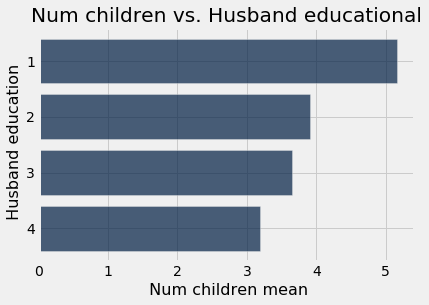

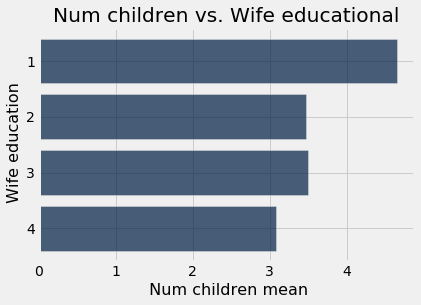

In [ ]:
# Use this cell to generate your quantitative plot
# draw a bar graph for the 'husband_and_children' table
husband_and_children_mean.barh(' Husband education', ' Num children mean')
plots.title('Num children vs. Husband educational')

# draw a bar graph for the 'wife_and_children' table
wife_and_children_mean.barh(' Wife education', ' Num children mean')
plots.title('Num children vs. Wife educational')

The bar graphs above suggest that the less educated a parent is, the more likely that the family will have more children. That is, there is a negative correlation between parents' education level and their number of children.

**Quantitative Plot:**

Next, we explore the data related to our next prediction problem: **'Is there a correlation between the wife's age and the number of children?'**. We, therefore, create a scatter plot to illustrate the relationship between the `Wife age` and `Num children`.

Text(0.5, 1.0, 'Relationship between Wife age and Num children')

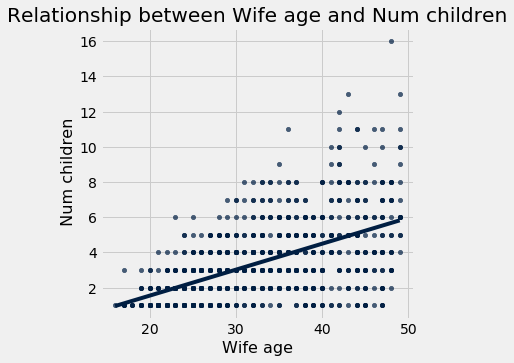

In [ ]:
# Use this cell to generate your qualitative plot
participant_family.scatter('Wife age', ' Num children', fit_line=True)
plots.title('Relationship between Wife age and Num children')

Based on the visualisation above, we can see that there is a positive correlation between the wife's age and the number of children. The distribution is, however, denser at the bottom part of the plot. It means that although the total children increase as the mother's age increases, there are still some family who have fewer children.

## Hypothesis Testing

**Do not copy code from demo notebooks or homeworks! You may split portions of your code into distinct cells. Also, be sure to
set a random seed so that your results are reproducible.**

In this section, we will try to answer the question: **'Does the mother's religious belief affect the number of children?'**, basing our conclusions on random samples and empirical distribution. The null hypothesis is that **the distribution of the number of children in a family is the same for mothers who are and are not Muslim, and any difference in the sample is due to chance.** While our alternative hypothesis is that **the mothers who are Muslim have more children, on average, than the mothers who are not.**

To do so, we will perform an A/B Testing procedure under a P-value cutoff of 5%. It involves comparing the variables against each other to determine if there is a statistically significant relationship or not. 

In [ ]:
# apply the group method to analyze the number of children in each family regarding the mother's religious belief
religion_and_children = participant_family.select(' Wife religion', ' Num children')
religion_and_children.group(' Wife religion')

Wife religion,count
0,135
1,801


In [ ]:
# calculate the percentage of Muslim women in our dataset
muslim_women_count = religion_and_children.group(' Wife religion')
muslim_women_percentage = muslim_women_count.column('count').item(1) / np.sum(muslim_women_count.column('count')) * 100
muslim_women_percentage

85.57692307692307

With an 85.58 to 14.42 ratio, we can say that the total number of Muslim mothers is much higher than the number of non-Muslim mothers.

/opt/conda/lib/python3.6/site-packages/datascience/tables.py:496: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))
/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Wife religion vs Num children')

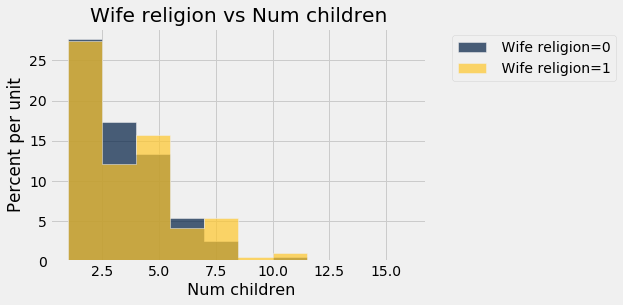

In [ ]:
# compare the distribution of the total number of children for Muslim and non-Muslim mothers
religion_and_children.hist(' Num children', group=' Wife religion')
plots.title('Wife religion vs Num children')

From the distribution above, Muslim mothers have slightly more children than non-Muslim mothers. This raises the question of whether Muslim mothers have more children than non-Muslim mothers. Could this happen due to chance?

In [ ]:
# find the difference of the mean number of children between the two groups
def diff_means(tbl, label, group_label):
    reduced = tbl.select(label, group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

observed_diff = diff_means(religion_and_children, ' Num children', ' Wife religion')
observed_diff

0.3857677902621721

The observed_diff of 0.39 indicates the difference between the average of the total child for Muslim mothers and non-Muslim mothers. This is the observed value of our test statistic.

In [ ]:
# implement the test
# set the random seed so that results are reproducible
np.random.seed(2)

# define the functions needed to generate the mean number of children from the sample 
def simulate_one_diff(tbl, label, group_label):
    """Take a table tbl and return the mean difference for muslim and non-muslim mothers."""
    shuffled_labels = tbl.sample(with_replacement = False).column(group_label)
    shuffled_table = tbl.select(label).with_column('Shuffled', shuffled_labels)
    return diff_means(shuffled_table, label, 'Shuffled')   

# permulation test
differences = make_array()
for i in np.arange(5000):
    one_diff = simulate_one_diff(participant_family,' Num children',' Wife religion')
    differences = np.append(differences, one_diff)

Observed Difference: 0.3857677902621721


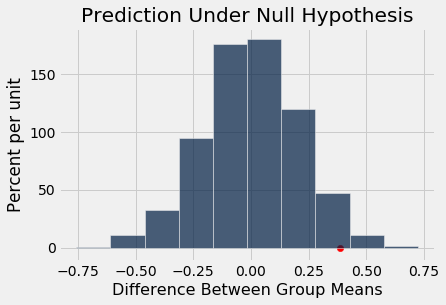

In [ ]:
# interpret the results
# plot a histogram from the differences array
Table().with_column('Difference Between Group Means', differences).hist()
plots.scatter(observed_diff, 0, color='red', s=40)
plots.title('Prediction Under Null Hypothesis')

# print out the observed_diff 
print('Observed Difference:', observed_diff)

Looking at how our histogram is centred around 0, our null hypothesis makes sense in a way where the mean difference of the number of children is about the same for both Muslim and non-Muslim mothers. Moreover, an observed difference of 0.39 resonates well with the distribution of the null hypothesis.

In [ ]:
# determine the p-value
p_value = np.mean(differences >= observed_diff)
p_value

0.0306

Since the P_value is around 3%, the result is, therefore, statiscally significant. Hence, we accept the alternative hypothesis that on average, Muslim mothers have more children than non-Muslim mothers.

## Prediction

**Be sure to set a random seed so that your results are reproducible.**

Lastly, we will build a Linear Regression model to determine whether the number of children ever born in a family can be predicted based on the mother's age. We employed this model because we are dealing with quantitative variables. Thus, we can predict the number of children, our dependent variable, based on the independent variable, the mother's age.

In [ ]:
# define the functions needed to fit the linear regression
def correlation(name, col1, col2):
    col1_mean, col1_std = name.column(col1).mean(), name.column(col1).std()
    col2_mean, col2_std = name.column(col2).mean(), name.column(col2).std()
    standard_unit1 = (name.column(col1) - col1_mean) / col1_std
    standard_unit2 = (name.column(col2) - col2_mean) / col2_std
    return np.mean(standard_unit1 * standard_unit2)
    
def slope(name, col1, col2):
    return correlation(name, col1, col2) * np.std(name.column(col2)) / np.std(name.column(col1))

def intercept(name, col1, col2):
    return np.mean(name.column(col2)) - slope(name, col1, col2) * np.mean(name.column(col1))

def parameters(name, col1, col2):
    r = correlation(name, col1, col2)
    slope = r * np.std(name.column(col2)) / np.std(name.column(col1))
    intercept = np.mean(name.column(col2)) - slope * np.mean(name.column(col1))
    return make_array(slope, intercept)

def fit(name, col1, col2):
    a = slope(name, col1, col2)
    b = intercept(name, col1, col2)
    return a * name.column(col1) + b

In [ ]:
# display the correlation between the Wife's age and the number of children
correlation(participant_family, 'Wife age', ' Num children')

0.5381670417570171

In [ ]:
# display the slope and intercept between the Wife's age and the number of children
parameters(participant_family, 'Wife age', ' Num children')

array([ 0.14739367, -1.39897356])

Text(0.5, 1.0, 'Original scatter plot along with the Fitted Values')

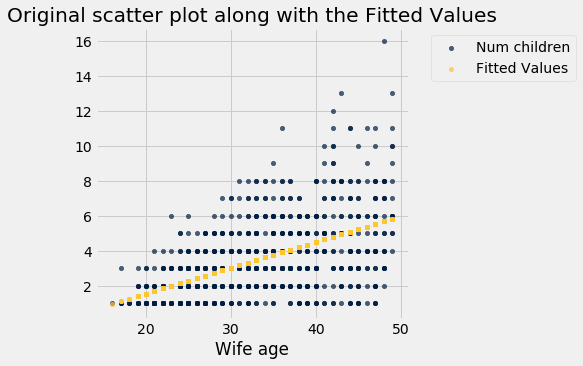

In [ ]:
# implement the predictive model
# fit the linear regression, store results in table
linear_regression = Table().with_columns(
    'Wife age', participant_family.column('Wife age'),
    'Num children', participant_family.column(' Num children'),
    'Fitted Values', fit(participant_family, 'Wife age', ' Num children'))

# plot the fitted results agains the Wife age
linear_regression.scatter('Wife age')
plots.title('Original scatter plot along with the Fitted Values')

Text(0.5, 1.0, 'Residual Plot')

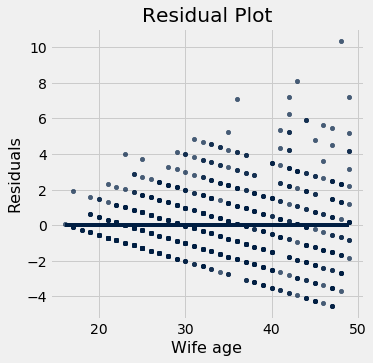

In [ ]:
# evaluate the model fit
# plot the residuals of our linear regression model
linear_regression = linear_regression.with_column(
    'Residuals', linear_regression.column(1) - linear_regression.column(2))
linear_regression.scatter('Wife age', 'Residuals', fit_line=True)
plots.title('Residual Plot')

In [ ]:
# interpreting the results
# see if our model fit the data well
age_children = participant.select('Wife age',' Num children')
age_children_mean = age_children.group('Wife age', np.mean)
coeff = parameters(participant_family, 'Wife age',' Num children')

predictions = make_array()

for i in np.arange(16,50):
    one_prediction = coeff[0] * i + coeff[1]
    predictions = np.append(predictions, one_prediction)
    
with_prediction = age_children_mean.with_columns('Linear Prediction', predictions)
with_difference = with_prediction.with_columns('Error', with_prediction.column(' Num children mean') - with_prediction.column('Linear Prediction'))
with_difference

Wife age,Num children mean,Linear Prediction,Error
16,1,0.959325,0.0406748
17,1.16667,1.10672,0.0599478
18,0.75,1.25411,-0.504113
19,1.0625,1.40151,-0.339006
20,1.33333,1.5489,-0.215567
21,1.09677,1.69629,-0.599519
22,1.35,1.84369,-0.493687
23,2,1.99108,0.00891914
24,1.875,2.13847,-0.263475
25,1.94737,2.28587,-0.3385


In [ ]:
# calculate the percent error of our model 
percent_errors = np.abs(with_difference.column('Error')) / with_difference.column(' Num children mean') * 100
percent_error = np.mean(percent_errors)
percent_error

14.720133343354444

With an R-value of 0.538, we can conclude that the two variables, `Wife age` and `Num children` are moderately correlated in a positive association. The residual plot indicates that linear regression is not a good model for `Wife age` vs `Num children`. Notice how the residuals are not distributed relatively symmetrically above and below the horizontal line at 0, corresponding to the original scatter plot being asymmetrical. Notice also that there appear patterns in the residual plot. Thus, this tells us that linear regression might not be the right model to understand the relationship between `Wife age` and `Num children`.

## Conclusion

We managed to answer our hypothesis testing question using the A/B Testing procedure. Since the P-value of around 3% is less than the P-value cutoff of 5%, it is statistically significant. Therefore, it has resulted in accepting the alternative hypothesis that Muslim mothers, on average, have more children than non-Muslim mothers. Surprisingly, we also came across another factor that may be associated with the number of children in a family. We found that the less educated a parent is, the more likely the family will have more children. We also attempted to make a Linear Regression model and predict the number of children given the wife's age. However, this is not the perfect model to use due to the presence of patterns and heteroscedasticity. Hence, a more powerful model will be required to capture the data and make a better prediction.

We noticed that 85.58% of our sample are Muslim women. This could affect our analysis in a way where one religious group might have a different distribution than the other group. This limitation might have contributed to why we got a 14.72% error in our model. Here, we created a model that takes religion to predict the number of children. Given the demographics of Indonesia, there is a possibility that our model won't work as well or be as accurate in a population where Muslim is not the dominant religion.

## Presentation

*In this section, you'll need to provide a link to your video presentation. If you've uploaded your presentation to YouTube,
you can include the URL in the code below. We've provided an example to show you how to do this. Otherwise, provide the link
in a markdown cell.*

**Link:** *Replace this text with a link to your video presentation*

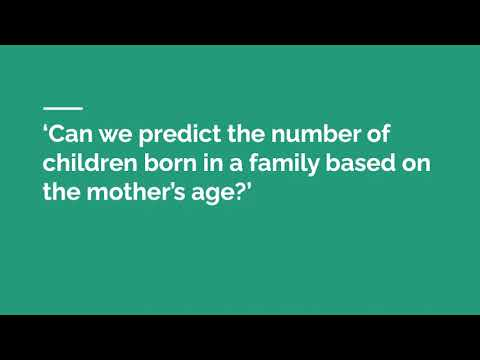

In [ ]:
# Full Link: https://www.youtube.com/watch?v=BKgdDLrSC5s&feature=emb_logo
# Plug in string between "v=" and ""&feature":
YouTubeVideo('C9qTnRIY2AA')

# Submission

*Just as with the other assignments in this course, please submit your research notebook to Okpy. We suggest that you
submit often so that your progress is saved.*

In [ ]:
# Run this line to submit your work
_ = ok.submit()